In [1]:
import pandas as pd
import numpy as np
import scipy
import sys
import os
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload

# local imports 
import graph as gr

In [2]:
# load the data

In [3]:
key = "ND"

dirpath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/graph_data/"
coordpath = f"{dirpath}coordinates.pq"
distpath = f"{dirpath}/distances/{key}_euclidean_distances.pq"
edgepath = f"{dirpath}/edge_lists/{key}_harmonic_highlevel_edgelist.pq"

cdf = pd.read_parquet(coordpath)
cdf = cdf[cdf['key'] == key].reset_index(drop=True)
print(f"{cdf.shape=}")
print(cdf.head())

D = pd.read_parquet(distpath)
D = D.drop(columns='key')
print(f"{D.shape=}")
# print(D.head())

E = pd.read_parquet(edgepath)
print(f"{E.shape=}")
# print(E.head())

# merge em!
df = pd.merge(D, E, 
              how='left',
              left_on=['node1', 'node2'],
              right_on=['node1', 'node2'])

print(f"{df.shape=}")
print(df.head())

cdf.shape=(2036, 5)
                  spotId key nodeId            x            y
0  AAACAAGTATCTCCCA.1_ND  ND    1_1  1263.912793  1164.571691
1  AAACAGCTTTCAGAAG.1_ND  ND    1_2   331.221482  1043.233630
2  AAACAGGGTCTATATT.1_ND  ND    1_3   371.414081  1112.975138
3  AAACATTTCCCGGATT.1_ND  ND    1_4  1213.938136  1356.563577
4  AAACCCGAACGAAATC.1_ND  ND    1_5  1394.171280  1077.242752
D.shape=(2071630, 3)
E.shape=(2071630, 9)
df.shape=(2071630, 10)
  node1 node2           d key  innate_innate  innate_adaptive  innate_other   
0   1_1   1_2  940.550906  ND       0.327893         0.095570      0.390540  \
1   1_1   1_3  893.988901  ND       0.348501         0.146438      0.365469   
2   1_1   1_4  198.389391  ND       0.359207         0.121602      0.361784   
3   1_1   1_5  156.823521  ND       0.221041         0.083095      0.428075   
4   1_1   1_6  755.059941  ND       0.146987         0.028646      0.443532   

   adaptive_adaptive  adaptive_other  other_other  
0           0.05

# Build random neighborhoods

In [21]:
reload(gr)

sample_size = 1
# n = len(cdf)
n = 59
t = 85

graphs = []

for i in range(sample_size):
    # point = cdf[['x', 'y']].sample(1).to_numpy().ravel()
    nbrhd = gr.get_neighborhood(cdf, 
                                # center=point, 
                                n=n, 
                                metric='minkowski')

    G = gr.build_graph(df, cdf, nbrhd, t)

    graphs.append(G)

print('done')

done


t=0.3


(805.7615115512999, 999.8643959487, 1144.6667239889, 975.7082890711)

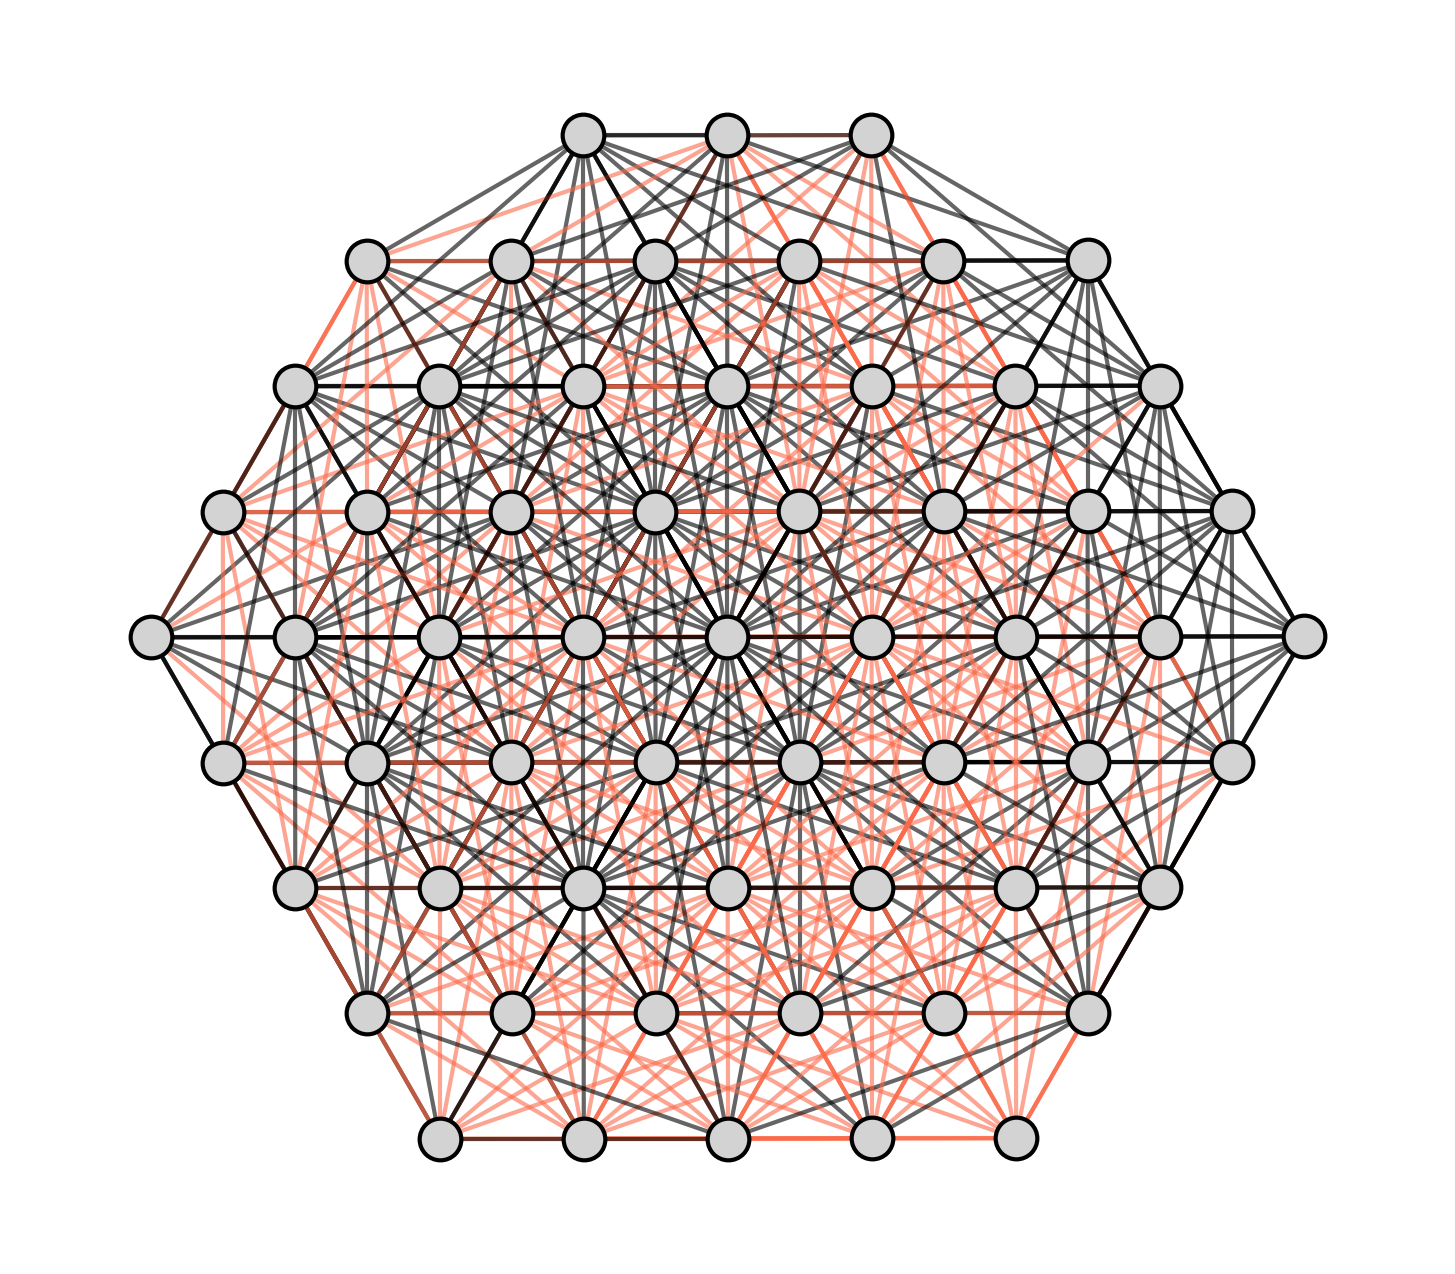

In [19]:
# relationship = 'adaptive_adaptive'
relationship = 'innate_innate'

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.facecolor'] = "none"
plt.rcParams['figure.figsize'] = 6, 6

# plotting params
lut = 5
cmap = plt.cm.get_cmap('Reds', lut=5)
cmap.set_bad(color = 'k', alpha = 0.002)
fig, ax = plt.subplots()

# node coloring
# centrality = nx.eigenvector_centrality(G, weight=relationship, tol=0.001)
# colors = [centrality[n] for n in G.nodes()]

# network plots
nx.draw_networkx_nodes(G,
                       pos=G.pos,
                       node_size=100,
                       # node_color=colors,
                       node_color='lightgrey',
                       # cmap=cmap,
                       # alpha=0.75,
                       edgecolors='k',
                       linewidths=1,
                       ax=ax)

eweights = np.array([e[relationship] for node1, node2, e in G.edges(data=True)])
# eq = 0.80
# t = np.quantile(eweights, eq)
t = 0.3
print(f"{t=}")
eweights = np.where(eweights > t, 0.4, np.nan)

nx.draw_networkx_edges(G,
                       pos=G.pos,
                       width=1,
                       # edge_color='grey',
                       edge_color=eweights,
                       edge_cmap=cmap,
                       edge_vmin=0, 
                       edge_vmax=1,
                       alpha=0.6,
                       ax=ax)   

ax.set_aspect('equal')
ax.invert_yaxis()
ax.axis('off')

In [ ]:
break

In [ ]:
eweights

In [ ]:
a = 0.8
b = 0.1
np.mean([a, b])
# scipy.stats.gmean([a, b])

In [ ]:
break

In [ ]:
t = (a + b) / (a * b)
print(t)

c = 2 / (1/a + 1/b)
print(c)

In [ ]:
break

In [ ]:
df.columns

In [ ]:
# A = nx.adjacency_matrix(G, weight='innate_innate')
# A = A.todense()
# L = scipy.sparse.csgraph.laplacian(A, normed=True)

# fig, axs = plt.subplots(1, 2)
# axs = axs.ravel()

# axs[0].matshow(A)
# axs[1].matshow(L)

# axs[0].set_xticks([])
# axs[0].set_yticks([])
# axs[1].set_xticks([])
# axs[1].set_yticks([])

# plt.tight_layout()